In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import joblib

In [2]:
# Load data
hot_100 = pd.read_csv("extended_hot_100.csv")
not_hot_100 = pd.read_csv("Extended_not_hot.csv")

# Concatenate
all_songs = pd.concat([hot_100, not_hot_100], ignore_index=True)

In [3]:
# Data Cleaning
all_songs = all_songs.dropna(subset=['valence', 'danceability'])

In [4]:
# Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_songs[['valence', 'danceability']])

In [5]:
# Determine Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


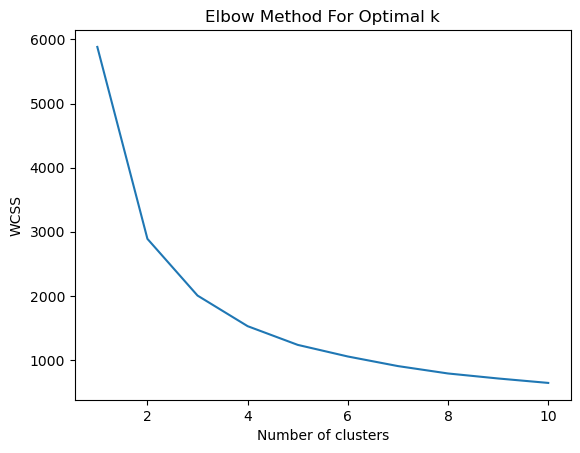

In [6]:
# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Optimal number
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
all_songs['Cluster'] = kmeans.fit_predict(scaled_features)

In [8]:
# PCA for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = all_songs['Cluster']

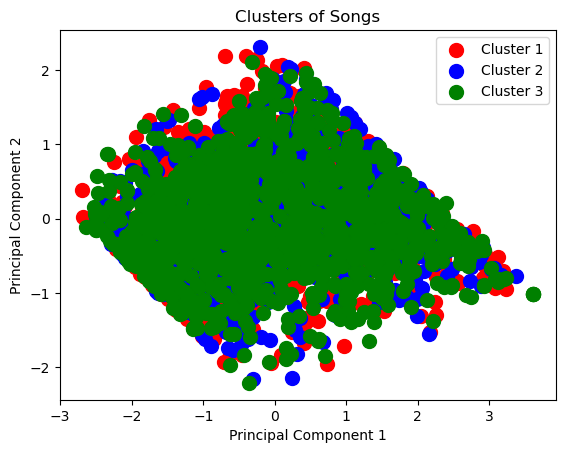

In [9]:
# Visualizing Clusters
plt.scatter(pc_df['PC1'][pc_df['Cluster'] == 0], pc_df['PC2'][pc_df['Cluster'] == 0], s=100, c='red', label='Cluster 1')
plt.scatter(pc_df['PC1'][pc_df['Cluster'] == 1], pc_df['PC2'][pc_df['Cluster'] == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(pc_df['PC1'][pc_df['Cluster'] == 2], pc_df['PC2'][pc_df['Cluster'] == 2], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [10]:
# Save Model and Data
joblib.dump(kmeans, 'kmeans_model.pkl')
all_songs.to_csv('all_songs_with_clusters.csv', index=False)